In [1]:
print("---imports start---")

import tensorflow as tf
# you need TFlite Version 2 or higher!
assert float(tf.__version__[:3]) >= 2.3

import os
import numpy as np
import matplotlib.pyplot as plt

print("---imports done---")

#TODO: change path here to your root folder of training data
meat_dir = os.path.normpath("C:/Users/holfa1/Downloads/Panda/Panda/Testdata_08-03-2022")

print(meat_dir)

IMAGE_SIZE = 224
BATCH_SIZE = 8

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

print('---training generator---')
train_generator = datagen.flow_from_directory(
    meat_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

print('---validation generator---')
val_generator = datagen.flow_from_directory(
    meat_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

---imports start---
---imports done---
C:\Users\holfa1\Downloads\Panda\Panda\Testdata_08-03-2022
---training generator---
Found 36 images belonging to 2 classes.
---validation generator---
Found 8 images belonging to 2 classes.


In [2]:
image_batch, label_batch = next(train_generator)
image_batch.shape, label_batch.shape

((8, 224, 224, 3), (8, 2))

In [3]:
print(train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('meat_labels.txt', 'w') as f:
    f.write(labels)

print(labels)

txtFile = open('meat_labels.txt', 'r')
txtFileContent = txtFile.read()
print('---labels file beginn---')
print(txtFileContent)
print('---labels file end---')
txtFile.close()


{'glatt': 0, 'toValidate': 1}
glatt
toValidate
---labels file beginn---
glatt
toValidate
---labels file end---


In [4]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

In [5]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  # TODO: be sure that you change units to the number of folders/classes of the training dataset!
  tf.keras.layers.Dense(units=2, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 32)          368672    
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 global_average_pooling2d (G  (None, 32)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 2,626,722
Trainable params: 368,738
Non-tr

In [8]:
print('Number of trainable weights = {}'.format(len(model.trainable_weights)))

Number of trainable weights = 4


In [9]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator), 
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

Epoch 1/10
5/5 [==============================] - 4s 395ms/step - loss: 0.9827 - accuracy: 0.7778 - val_loss: 4.4703e-08 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 1s 245ms/step - loss: 1.3652 - accuracy: 0.8889 - val_loss: 6.0946e-06 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 1s 189ms/step - loss: 0.5861 - accuracy: 0.8889 - val_loss: 0.1088 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 1s 175ms/step - loss: 0.4855 - accuracy: 0.9444 - val_loss: 0.2502 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 1s 200ms/step - loss: 0.2786 - accuracy: 0.8889 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 1s 199ms/step - loss: 0.2441 - accuracy: 0.8889 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 1s 208ms/step - loss: 0.2009 - accuracy: 0.8889 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 8/10
5

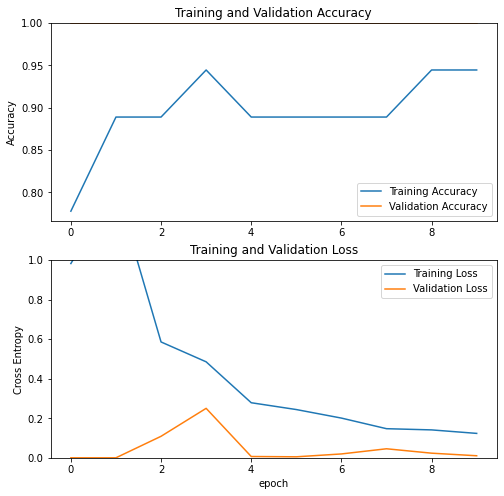

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Number of layers in the base model:  154
Number of trainable weights = 58
Epoch 1/5
5/5 [==============================] - 4s 396ms/step - loss: 0.2542 - accuracy: 0.8889 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 2/5
5/5 [==============================] - 1s 229ms/step - loss: 0.2326 - accuracy: 0.8889 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 3/5
5/5 [==============================] - 1s 234ms/step - loss: 0.1756 - accuracy: 0.8889 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 4/5
5/5 [==============================] - 1s 234ms/step - loss: 0.1779 - accuracy: 0.8889 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 5/5
5/5 [==============================] - 1s 238ms/step - loss: 0.1559 - accuracy: 0.8889 - val_loss: 0.0073 - val_accuracy: 1.0000


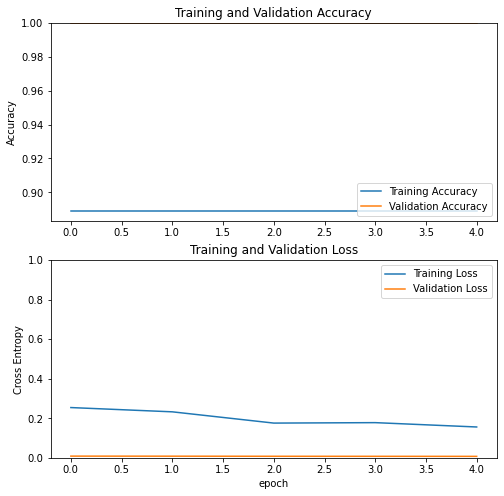

In [11]:
print("Number of layers in the base model: ", len(base_model.layers))

base_model.trainable = True
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False
  
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

print('Number of trainable weights = {}'.format(len(model.trainable_weights)))

history_fine = model.fit(train_generator,
                         steps_per_epoch=len(train_generator), 
                         epochs=5,
                         validation_data=val_generator,
                         validation_steps=len(val_generator))

acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('mobilenet_v2_1.0_224.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\holfa1\AppData\Local\Temp\tmp2do6apig\assets


INFO:tensorflow:Assets written to: C:\Users\holfa1\AppData\Local\Temp\tmp2do6apig\assets
Exception ignored in: <function ConcreteFunctionGarbageCollector.__del__ at 0x000002A9F2FF5AF0>
Traceback (most recent call last):
  File "c:\Users\holfa1\Anaconda3\lib\site-packages\tensorflow\python\eager\function.py", line 3286, in __del__
    if func_graph_module is None or memory is None or self._func_graph is None:
KeyboardInterrupt: 


In [ ]:
# A generator that provides a representative dataset
def representative_data_gen():
  dataset_list = tf.data.Dataset.list_files(meat_dir + '/*/*')
  for i in range(100):
    image = next(iter(dataset_list))
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image = tf.cast(image / 255., tf.float32)
    image = tf.expand_dims(image, 0)
    yield [image]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
# This enables quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# This sets the representative dataset for quantization
converter.representative_dataset = representative_data_gen
# This ensures that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# For full integer quantization, though supported types defaults to int8 only, we explicitly declare it for clarity.
converter.target_spec.supported_types = [tf.int8]
# These set the input and output tensors to uint8 (added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
tflite_model = converter.convert()

with open('mobilenet_v2_1.0_224_quant.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\holfa1\AppData\Local\Temp\tmpus34hf5r\assets


INFO:tensorflow:Assets written to: C:\Users\holfa1\AppData\Local\Temp\tmpus34hf5r\assets
c:\Users\holfa1\Anaconda3\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
batch_images, batch_labels = next(val_generator)

logits = model(batch_images)
prediction = np.argmax(logits, axis=1)
truth = np.argmax(batch_labels, axis=1)

keras_accuracy = tf.keras.metrics.Accuracy()
keras_accuracy(prediction, truth)

print("Raw model accuracy: {:.3%}".format(keras_accuracy.result()))

Raw model accuracy: 100.000%


In [ ]:
def set_input_tensor(interpreter, input):
  input_details = interpreter.get_input_details()[0]
  tensor_index = input_details['index']
  input_tensor = interpreter.tensor(tensor_index)()[0]
  # Inputs for the TFLite model must be uint8, so we quantize our input data.
  # NOTE: This step is necessary only because we're receiving input data from
  # ImageDataGenerator, which rescaled all image data to float [0,1]. When using
  # bitmap inputs, they're already uint8 [0,255] so this can be replaced with:
  #   input_tensor[:, :] = input
  scale, zero_point = input_details['quantization']
  input_tensor[:, :] = np.uint8(input / scale + zero_point)

def classify_image(interpreter, input):
  set_input_tensor(interpreter, input)
  interpreter.invoke()
  output_details = interpreter.get_output_details()[0]
  output = interpreter.get_tensor(output_details['index'])
  # Outputs from the TFLite model are uint8, so we dequantize the results:
  scale, zero_point = output_details['quantization']
  output = scale * (output - zero_point)
  top_1 = np.argmax(output)
  return top_1

interpreter = tf.lite.Interpreter('mobilenet_v2_1.0_224_quant.tflite')
interpreter.allocate_tensors()

# Collect all inference predictions in a list
batch_prediction = []
batch_truth = np.argmax(batch_labels, axis=1)

for i in range(len(batch_images)):
  prediction = classify_image(interpreter, batch_images[i])
  batch_prediction.append(prediction)

# Compare all predictions to the ground truth
tflite_accuracy = tf.keras.metrics.Accuracy()
tflite_accuracy(batch_prediction, batch_truth)
print("Quant TF Lite accuracy: {:.3%}".format(tflite_accuracy.result()))

Quant TF Lite accuracy: 100.000%


edgetpu_compiler mobilenet_v2_1.0_224_quant.tflite

--> command to compile quantisized .tflite model to a .edgetpu compatible model